In [1]:
from PIL import Image
import os
import numpy as np
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
train_dir = './TRAIN'
test_dir = './TEST'
size = 120
lr = 1e-3 

In [3]:
def label_img(img):
    word_label = img.split('_')[0] #gets the name of the brand
    if word_label == 'NIKE':
        return [1,0]
    
    elif word_label == 'ADIDAS':
        return [0,1]

In [4]:
def create_train_data():
    train_dataset = []
    for image in tqdm(os.listdir(train_dir)):
        label = label_img(image)
        path = os.path.join(train_dir, image)
        image = Image.open(path)
        
        #Grayscale conversion using PIL - channel L is for single channel
        #channel P is for mode or palettized
        image = image.convert('L')
        image = image.resize((size, size), Image.ANTIALIAS) #using this lib instead of cv2
        #eqvt of cv2 is cv2.cvtColor and cv2.resize( ,(bicubic, NN interpolation arg, etc)) 
        
        train_dataset.append([np.array(image), np.array(label)])
        
    shuffle(train_dataset)
    np.save('train_data.npy', train_dataset)
    return train_dataset
    

In [5]:
def process_test_data():
    test_dataset = []
    for image in tqdm(os.listdir(test_dir)):
        path = os.path.join(test_dir, image)
        if "DS_Store" not in path:
            image_idx = image.split('_')[1] #images are like NIKE_7 etc
            image = Image.open(path)
            image = image.convert('L')
            image = image.resize((size, size), Image.ANTIALIAS)
            
            test_dataset.append([np.array(image), np.array(image_idx)])
            
    shuffle(test_dataset)    
    np.save('test_data.npy', test_dataset)
    return test_dataset    

100%|██████████| 100/100 [00:00<00:00, 409.75it/s]


[1 0]


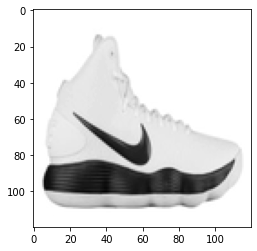

In [6]:
train_dataset = create_train_data()
plt.imshow(train_dataset[43][0], cmap = 'gray')
print(train_dataset[43][1])    

In [9]:
#using tflearn instead of tensorflow/keras

import tensorflow as tf
import keras
from tensorflow.keras import layers
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Input


In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(size, size, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
# inp = Input(shape=[size, size, 1], name = 'input')
# convnet = Conv2D(32, 5, activation = 'relu')(inp)
# convnet = MaxPool2D((5, 5))(convnet)
# convnet = Conv2D(64, 5, activation = 'relu')(convnet)
# convnet = MaxPool2D((5, 5))(convnet)
# convnet = Conv2D(convnet, 32, 5, activation = 'relu')(convnet)
# convnet = MaxPool2D((5, 5))(convnet)
# convnet = Conv2D(convnet, 64, 5, activation = 'relu')(convnet)
# convnet = MaxPool2D((5, 5))(convnet)
# convnet = Conv2D(convnet, 32, 5, activation = 'relu')(convnet)
# convnet = MaxPool2D((5, 5))(convnet)
# convnet = Conv2D(convnet, 64, 5, activation = 'relu')(convnet)
# convnet = MaxPool2D((5, 5))(convnet)
# convnet = Dense(1024, activation = 'relu')(convnet)
# convnet = Dropout(0.8)(convnet)
# out = Dense(2, activation = 'softmax')(convnet)

# model = Model(inputs = inp, outputs = out)